# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [26]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int32  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int16  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(2), int32(3), int64(2)
memory usage: 131.0 MB


In [35]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [36]:
transactions.value_counts()

household_key  BASKET_ID    DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  STORE_ID  RETAIL_DISC  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC
1              27601281299  51   825123      1         3.99         436        0.00        8         0.0         0.0                  1
1407           34577315027  499  949294      1         4.99         31862      0.00        72        0.0         0.0                  1
               34203780035  486  1090793     1         2.99         31862     -1.40        70        0.0         0.0                  1
                                 829866      1         2.99         31862     -1.40        70        0.0         0.0                  1
               33994117492  471  6919636     1         1.00         31862     -0.29        68        0.0         0.0                  1
                                                                                                                                     ..
710            33944832626  467  934131      3       

In [46]:
transactions[["BASKET_ID","PRODUCT_ID","household_key"]].nunique()

BASKET_ID        232939
PRODUCT_ID        84138
household_key      2099
dtype: int64

In [47]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [86]:
new_df = transactions.assign(
    total_discount = lambda x: x["RETAIL_DISC"] + x["COUPON_DISC"],
    per_dis = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs()))

new_df["per_dis"] = (new_df["per_dis"]
                     .where(new_df["per_dis"] < 1, 1.0 )
                     .where( new_df["per_dis"]> 1, 0)
                    )


In [87]:
new_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,per_dis
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.0


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [93]:
new_df[["SALES_VALUE","total_discount","QUANTITY"]].sum()

SALES_VALUE       6.666243e+06
total_discount   -1.178658e+06
QUANTITY          2.167136e+08
dtype: float64

In [91]:
new_df["total_discount"].sum() / new_df["SALES_VALUE"].sum()

-0.1768099350106248

In [94]:
transactions["QUANTITY"].max()

89638

In [95]:
new_df["QUANTITY"].max()

89638

In [97]:
transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

28.61797938516092

In [98]:
transactions.loc[transactions["QUANTITY"].argmax()]

household_key        6.300000e+02
BASKET_ID            3.474915e+10
DAY                  5.030000e+02
PRODUCT_ID           6.534178e+06
QUANTITY             8.963800e+04
SALES_VALUE          2.500000e+02
STORE_ID             3.840000e+02
RETAIL_DISC         -1.345000e+01
WEEK_NO              7.300000e+01
COUPON_DISC          0.000000e+00
COUPON_MATCH_DISC    0.000000e+00
Name: 1442095, dtype: float64

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [104]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


<Axes: xlabel='household_key'>

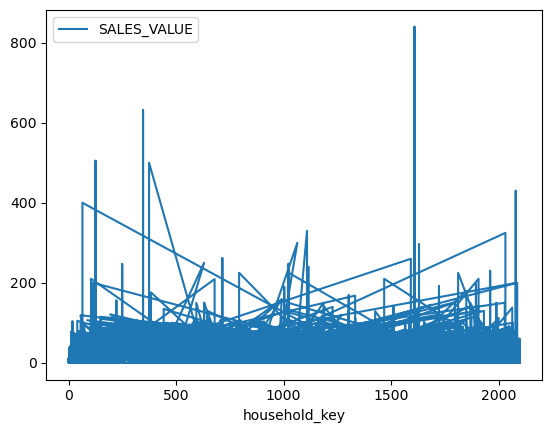

In [102]:
transactions[["household_key","SALES_VALUE"]].plot(x='household_key')

<Axes: title={'center': 'Distribution of Total Sales Value per Household'}, ylabel='Frequency'>

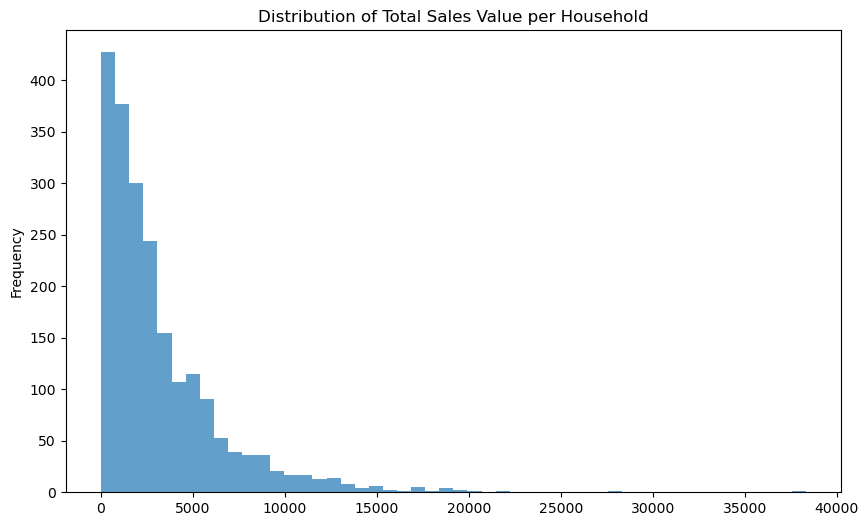

In [112]:
transactions.groupby("household_key")["SALES_VALUE"].sum().plot(
    kind='hist',
    bins=50,
    figsize=(10, 6),
    alpha=0.7,
    title='Distribution of Total Sales Value per Household'
)

In [136]:
(transactions
 .groupby("household_key")[["QUANTITY"]]
 .sum()
 .sort_values(by="QUANTITY", ascending=False)
 .iloc[:10]

)

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


<Axes: xlabel='household_key'>

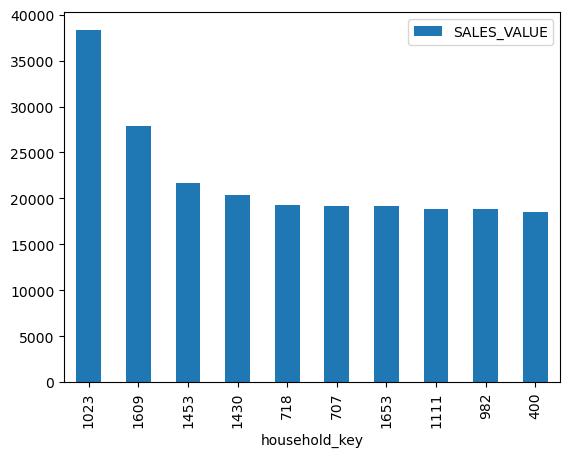

In [148]:
dff1= (transactions
 .groupby("household_key")
 .agg({"SALES_VALUE" : "sum"})
 .sort_values(by = "SALES_VALUE", ascending = False ).iloc[:10]
)
dff1.plot.bar()

<Axes: xlabel='household_key'>

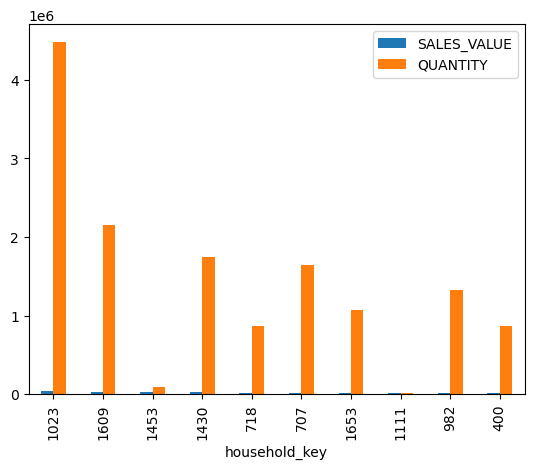

In [146]:
#Plot the total sales value for our top 10 households by value, ordered from highest to lowest.
dff= (transactions
 .groupby(["household_key"])
 .agg({"SALES_VALUE" : "sum", "QUANTITY"  : "sum"})
 .sort_values(by = "SALES_VALUE", ascending = False ).iloc[:10]
)
dff.plot.bar()



## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [149]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


<Axes: ylabel='PRODUCT_ID'>

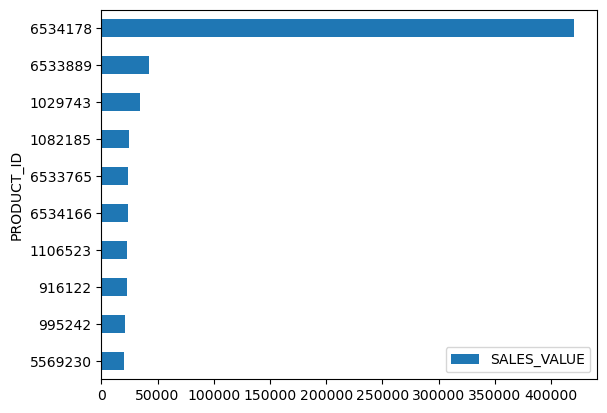

In [171]:
k = (transactions
 .groupby('PRODUCT_ID')
 .agg({'SALES_VALUE' : 'sum'})
 #.reset_index()
 .sort_values(by ='SALES_VALUE', ascending = False)
 .iloc[:10 , :]
)
k.sort_values(by ='SALES_VALUE').plot.barh()

In [172]:
new_df.head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,per_dis
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.0


In [173]:
new_df["total_discount"].mean()

-0.5491553088065988

In [182]:
#Did the top 10 selling items have a higher than average discount rate?
# Or in other words check whether that mean discount of the top 10 products calculated is higher than that of the mean of the total

(new_df
 .query('PRODUCT_ID in @k.index')
 .agg({"total_discount" : "sum"})
 .item()
) / (new_df
 .query('PRODUCT_ID in @k.index')
 .agg({"SALES_VALUE" : "sum"})
 .item()
) 


-0.10331267387397927

In [183]:
# read in products data

products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [193]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [198]:
j = (transactions
     .groupby("household_key")
     .agg({"SALES_VALUE": "sum"})
     .sort_values(by = "SALES_VALUE", ascending = False)
     .iloc[:10]
    )
j

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [204]:
#What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?
top_10_house_hold_products_according_to_sales_value =(transactions
 .query('household_key in @j.index')
 .loc[:, "PRODUCT_ID"]
 .value_counts()
 .iloc[:10]
 .index
)

top_10_house_hold_products_according_to_sales_value


Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776, 1106523,
        981760, 9677202],
      dtype='int64', name='PRODUCT_ID')

In [205]:
#Look up the names of the top 10 products by sales in the products.csv dataset.

(products
 .query('PRODUCT_ID in @top_10_house_hold_products_according_to_sales_value')
)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [189]:
k

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [190]:
top10_value = (transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .iloc[:10])
top10_value


,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [200]:
top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index
                  )

top_hh_products

Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776, 1106523,
        981760, 9677202],
      dtype='int64', name='PRODUCT_ID')

In [206]:
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [214]:
kl= (transactions
     .groupby('PRODUCT_ID')
     .agg({'QUANTITY' : 'sum'})
     .sort_values(by = 'QUANTITY', ascending = False)
     .iloc[:10]
    )


kl


,QUANTITY
PRODUCT_ID,
6534178,180705254
6533889,16904944
6534166,9880540
6544236,2400961
397896,1181305
1404121,1135804
480014,428311
5668996,266088
6410462,211085


In [213]:
#Look up the product name of the item that had the highest quantity sold in a single row.
k = (transactions
 .groupby('PRODUCT_ID')
 .agg({'SALES_VALUE' : 'sum'})
 #.reset_index()
 .sort_values(by ='SALES_VALUE', ascending = False)
 .iloc[:10 , :]
)
(products
 .query('PRODUCT_ID in @kl')
)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
3565,397896,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
4058,480014,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
44796,1404121,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
54694,5668996,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
54801,5703832,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
56279,6410462,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57335,6544236,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [215]:
top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72
